## HW؟-Clustering


### Kmeans:

In this question, the goal is to implement the k-means algorithm. You are not allowed to use any ready-made Python libraries for this purpose. This implementation should be used to solve the following questions. The k-means algorithm must run until the cluster centers no longer change.

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA


#### Part 1:

Utilize the subsequent cell in order to create the Dataset. Afterwards, try to execute the algorithm with k=2 centroids. At Kmeans, it is recommended to execute the algorithm with several various starting states in order to eventually choose the best respective result.

In [43]:
file = r"E:\KHU\ML\K-means\Breast Cancer dataset\Breast_Cancer_dataset.txt"

data = pd.read_csv(file)

data.replace("?", pd.NA, inplace=True)
data.dropna(inplace=True)


categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X = X.astype(float)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print("Info:")
print(data.info())
print(data.head())

Info:
<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 284
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   '40-49'              276 non-null    int64
 1   'premeno'            276 non-null    int64
 2   '15-19'              276 non-null    int64
 3   '0-2'                276 non-null    int64
 4   'yes'                276 non-null    int64
 5   '3'                  276 non-null    int64
 6   'right'              276 non-null    int64
 7   'left_up'            276 non-null    int64
 8   'no'                 276 non-null    int64
 9   'recurrence-events'  276 non-null    int64
dtypes: int64(10)
memory usage: 23.7 KB
None
   '40-49'  'premeno'  '15-19'  '0-2'  'yes'  '3'  'right'  'left_up'  'no'  \
0        3          0        2      0      0    0        1          0     0   
1        3          0        6      0      0    1        0          1     0   
2        2          2        6      

## KMeans Implementation

In [44]:
class KMeans:
    def __init__(self, n_clusters=3, iterations=300, random_state=None):
        self.n_clusters = n_clusters
        self.iterations = iterations
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def initialize_centroids(self, X):
       np.random.seed(self.random_state)
       indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
       return X[indices]

    def assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)
    
    def update_centroids(self, X):
        return np.array([X[self.labels == i].mean(axis=0) for i in range(self.n_clusters)])
    

    def fit(self, X):
        self.centroids = self.initialize_centroids(X)

        for i in range(self.iterations):
            self.labels = self.assign_clusters(X)
            new_centroids = self.update_centroids(X)

            if np.allclose(self.centroids, new_centroids):
                break

            self.centroids = new_centroids


    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def Visualize(self, X, centroids, labels):
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x')
        plt.show()
    

### Display the changes in cost:
Plot the results in a line chart where the horizontal axis represents the run number of the algorithm and the vertical axis represents the cost (error). The chart should show the changes in cost over the 20 different runs.

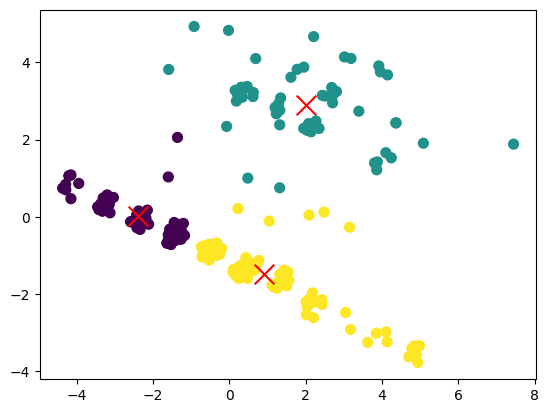

In [45]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_reduced)

labels = kmeans.predict(X_reduced)
kmeans.Visualize(X_reduced, kmeans.centroids, labels)

In [53]:
def map_clusters_to_labels(labels, y):
    mapping = {}
    for cluster in np.unique(labels):
        true_labels = y[labels == cluster]
        most_common = np.bincount(true_labels).argmax()
        mapping[cluster] = most_common
    return mapping

mapping = map_clusters_to_labels(labels, y)
predicted_labels = np.array([mapping[label] for label in labels])


TP = np.sum((predicted_labels == 1) & (y == 1))
FP = np.sum((predicted_labels == 1) & (y == 0))
FN = np.sum((predicted_labels == 0) & (y == 1))
TN = np.sum((predicted_labels == 0) & (y == 0))

accuracy = (TP + TN) / len(y)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
error_rate = 1 - accuracy

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Error Rate: {error_rate:.2f}")


Accuracy: 0.51
Precision: 0.51
Recall: 0.48
Error Rate: 0.49


#### Part 2:

Use the cell below to create a new dataset. Then try to run the mentioned algorithm on the new dataset and finally visualize the final results (there is no problem to use the relevant Python libraries like `matplotlib`). Consider two clusters for this part.

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_classification

In [49]:
class KMeans:
    def __init__(self, n_clusters=2, iterations=300, random_state=None):
        self.n_clusters = n_clusters
        self.iterations = iterations
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def initialize_centroids(self, X):
       np.random.seed(self.random_state)
       indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
       return X[indices]

    def assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)
    
    def update_centroids(self, X):
        return np.array([X[self.labels == i].mean(axis=0) for i in range(self.n_clusters)])
    
    def fit(self, X):
        self.centroids = self.initialize_centroids(X)

        for i in range(self.iterations):
            self.labels = self.assign_clusters(X)
            new_centroids = self.update_centroids(X)

            if np.allclose(self.centroids, new_centroids):
                break

            self.centroids = new_centroids

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def Visualize(self, X, centroids, labels):
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x')
        plt.title('Clustering Results')
        plt.show()

In [50]:
X, y = make_classification(n_samples=700, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)

scaler = StandardScaler()
X = scaler.fit_transform(X)

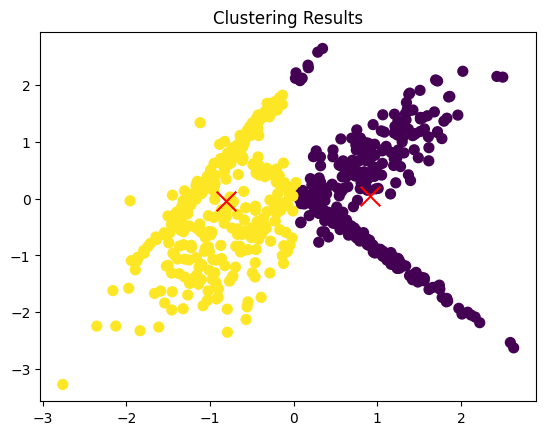

In [52]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

labels = kmeans.predict(X)

kmeans.Visualize(X, kmeans.centroids, labels)

In [56]:
def map_clusters_to_labels(labels, y):
    mapping = {}
    for cluster in np.unique(labels):
        true_labels = y[labels == cluster]
        most_common = np.bincount(true_labels).argmax()
        mapping[cluster] = most_common
    return mapping

mapping = map_clusters_to_labels(labels, y)
predicted_labels = np.array([mapping[label] for label in labels])


TP = np.sum((predicted_labels == 1) & (y == 1))
FP = np.sum((predicted_labels == 1) & (y == 0))
FN = np.sum((predicted_labels == 0) & (y == 1))
TN = np.sum((predicted_labels == 0) & (y == 0))

accuracy = (TP + TN) / len(y)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
error_rate = 1 - accuracy

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Error Rate: {error_rate:.2f}")


Accuracy: 0.51
Precision: 0.51
Recall: 0.48
Error Rate: 0.49
